## Install required libraries

In [1]:
# install library to parse wiki
!conda install -c conda-forge newspaper3k -y

# install wordcloud library
!conda install -c conda-forge wordcloud -y

# install pillow library
!conda install -c anaconda pillow -y

## Retrieve Wikipedia article text

In [2]:
# import Article module
from newspaper import Article

# retrieve article content
URL = 'https://en.wikipedia.org/wiki/India'
article = Article(URL)
article.download()
article.parse()

# display article text
article.text

'This article is about the Republic of India. For other uses, see India (disambiguation)\n\n"Bharat" redirects here. For other uses, see Bharat (disambiguation)\n\nCountry in South Asia\n\nIndia, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by land area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia.\n\nModern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-g

## Create a square word cloud

In [3]:
# import requsiste modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# use custom font
# http://www.mansgreback.com/fonts/billion-dreams
font_path = '/home/bhushan/Downloads/India_wordcloud/fonts/\
billion_dreams/BillionDreams_PERSONAL.ttf'

# create square WordCloud
wc = WordCloud(background_color = 'white', stopwords = STOPWORDS,
               max_font_size = 200, min_font_size = 25,
               font_path = font_path, random_state = 1,
               width = 1000, height = 1000)
wc.generate(article.text)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')
plt.savefig('India_wordcloud_1.jpg', dpi=1000,
            pad_inches=0, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 1 Axes>

## Create a word cloud in India's shape

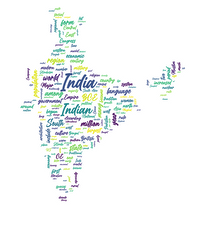

In [4]:
# import requisite module and library
from PIL import Image
import numpy as np

# import India mask
mask_path = '/home/bhushan/Downloads/India_wordcloud/India_mask.jpg'

# read mask into a numpy array
mask = np.array(Image.open(mask_path))

# create WordCloud in India mask
wc = WordCloud(background_color = 'white', stopwords = STOPWORDS,
               max_font_size = 150, font_path = font_path,
               random_state = 1, mask = mask,
               width = mask.shape[1], height = mask.shape[0])
wc.generate(article.text)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')
plt.savefig('India_wordcloud_2.jpg', dpi = 1000,
            pad_inches = 0, bbox_inches = 'tight')
plt.show()